<center>
    <font face= "Anton" style="font-size:100px">  STUDENTS </font> <br>
    <font style="font-size:50px"> in  </font><br>
    <font face= "product sans" style= "font-size:100px"> LockDown </font>
  
</center>

#### This dataset represents the students' behaviour when they are in the lockdown 2020. <br>
There are many fields which give some nice details about the students' time...

## Why, I chose this project:
* As being the student I can relate (kind of - the least kind of) myself with the data
* This was the first Dataset that I saw on kaggle after scrolling 5 times and made me feel like - *yeh!* this is what I should go with this time.

Special! - If you are not interested in my project then [checkout my project here!](https://www.kaggle.com/aayushsameershah/first-eda)

# 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set();

In [2]:
df = pd.read_csv('./data.csv')

In [3]:
df

,ID,Region of residence,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Health issue during lockdown,Stress busters,Time utilized,"Do you find yourself more connected with your family, close friends , relatives ?",What you miss the most
0,R1,Delhi-NCR,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,Linkedin,1,4,Increased,NO,Cooking,YES,YES,School/college
1,R2,Delhi-NCR,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,Youtube,0,3,Decreased,NO,Scrolling through social media,YES,NO,Roaming around freely
2,R3,Delhi-NCR,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,Linkedin,0,3,Remain Constant,NO,Listening to music,NO,YES,Travelling
3,R4,Delhi-NCR,20,3.0,Very poor,Smartphone,2.0,1.0,6.0,5.0,Instagram,0,3,Decreased,NO,Watching web series,NO,NO,"Friends , relatives"
4,R5,Delhi-NCR,21,3.0,Good,Laptop/Desktop,3.0,1.0,8.0,3.0,Instagram,1,4,Remain Constant,NO,Social Media,NO,NO,Travelling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,R1191,Delhi-NCR,12,3.0,Good,Smartphone,4.0,1.0,8.0,1.0,Instagram,2,3,Decreased,NO,Dancing,YES,YES,Travelling
1178,R1192,Delhi-NCR,14,6.0,Average,Smartphone,4.0,1.0,9.0,1.0,Whatsapp,1,4,Remain Constant,NO,Listening to music,YES,YES,"Friends , relatives"
1179,R1193,Delhi-NCR,13,4.0,Average,Smartphone,0.0,0.5,8.0,3.0,Youtube,2,4,Decreased,NO,Online gaming,NO,YES,School/college
1180,R1194,Delhi-NCR,14,5.0,Excellent,Laptop/Desktop,3.5,1.0,8.0,0.5,Youtube,1,4,Remain Constant,NO,Reading books,YES,YES,School/college


In [4]:
rename = ['ID', 'location', 'age', 'class_time', 'rate', 'medium', 'self_study_time', 'fitness_time', 'sleep_time', 'social_time', 'social', 'tv_time', 'meals', 'weight', 'health_iss', 
 'free_mind', 'produ_time', 'connected_ffr', 'miss']

In [5]:
original = dict(zip(df.columns, rename))

## Renaming the df

In [6]:
df.columns = rename
df.head()

,ID,location,age,class_time,rate,medium,self_study_time,fitness_time,sleep_time,social_time,social,tv_time,meals,weight,health_iss,free_mind,produ_time,connected_ffr,miss
0,R1,Delhi-NCR,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,Linkedin,1,4,Increased,NO,Cooking,YES,YES,School/college
1,R2,Delhi-NCR,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,Youtube,0,3,Decreased,NO,Scrolling through social media,YES,NO,Roaming around freely
2,R3,Delhi-NCR,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,Linkedin,0,3,Remain Constant,NO,Listening to music,NO,YES,Travelling
3,R4,Delhi-NCR,20,3.0,Very poor,Smartphone,2.0,1.0,6.0,5.0,Instagram,0,3,Decreased,NO,Watching web series,NO,NO,"Friends , relatives"
4,R5,Delhi-NCR,21,3.0,Good,Laptop/Desktop,3.0,1.0,8.0,3.0,Instagram,1,4,Remain Constant,NO,Social Media,NO,NO,Travelling


In [7]:
nas_cols = df.isna().any()

In [8]:
nas_rows = df.loc[:, nas_cols].isna().any(1)
nas_row_index = nas_rows[nas_rows == True]

<AxesSubplot:>

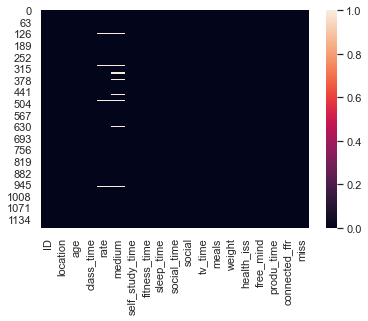

In [9]:
sns.heatmap(df.isna())

We may drop all the rows which are having nulls, but I think we should fill `Random` values from that column

In [10]:
# A function to fill data randomly
def fill_it(value, col):
    if type(value) == type(.0):
        return np.random.choice(df[col])
    return value

In [13]:
# Filling in
for col in nas_cols[nas_cols == True].index:
    df.loc[:, col] = df.loc[:, col].apply(fill_it, args= [col])

<AxesSubplot:>

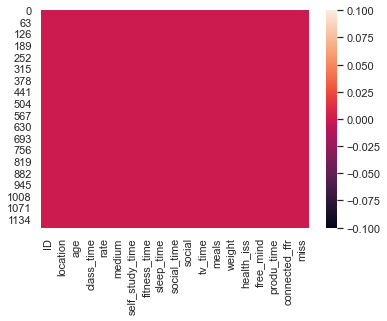

In [16]:
sns.heatmap(df.isna())

## Clear!

# 

In [17]:
df.head()

,ID,location,age,class_time,rate,medium,self_study_time,fitness_time,sleep_time,social_time,social,tv_time,meals,weight,health_iss,free_mind,produ_time,connected_ffr,miss
0,R1,Delhi-NCR,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,Linkedin,1,4,Increased,NO,Cooking,YES,YES,School/college
1,R2,Delhi-NCR,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,Youtube,0,3,Decreased,NO,Scrolling through social media,YES,NO,Roaming around freely
2,R3,Delhi-NCR,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,Linkedin,0,3,Remain Constant,NO,Listening to music,NO,YES,Travelling
3,R4,Delhi-NCR,20,3.0,Very poor,Smartphone,2.0,1.0,6.0,5.0,Instagram,0,3,Decreased,NO,Watching web series,NO,NO,"Friends , relatives"
4,R5,Delhi-NCR,21,3.0,Good,Laptop/Desktop,3.0,1.0,8.0,3.0,Instagram,1,4,Remain Constant,NO,Social Media,NO,NO,Travelling


In [18]:
df.drop(['ID'], axis= 1, inplace= True)

In [19]:
df.sample(5)

,location,age,class_time,rate,medium,self_study_time,fitness_time,sleep_time,social_time,social,tv_time,meals,weight,health_iss,free_mind,produ_time,connected_ffr,miss
222,Delhi-NCR,23,1.0,Very poor,Smartphone,8.0,2.0,8.0,2.0,Instagram,2,3,Decreased,NO,Online gaming,YES,YES,"Friends , relatives"
958,Delhi-NCR,11,2.0,Excellent,Smartphone,1.0,0.0,10.0,3.0,Youtube,2,3,Increased,NO,Online gaming,YES,YES,"Friends , relatives"
637,Outside Delhi-NCR,28,2.0,Excellent,Laptop/Desktop,2.0,1.0,7.0,1.0,Facebook,1,2,Decreased,NO,Scrolling through social media,YES,YES,"Friends , relatives"
784,Delhi-NCR,35,3.0,Good,Laptop/Desktop,3.0,1.0,7.0,1.0,Whatsapp,1,3,Remain Constant,NO,Sleeping,NO,NO,School/college
563,Delhi-NCR,21,8.0,Good,Laptop/Desktop,2.0,1.0,7.0,1.0,Whatsapp,0,3,Remain Constant,NO,Talking,YES,YES,Eating outside


In [41]:
#Setting stuff
plt.rcParams['figure.figsize'] = 20, 5
plt.rcParams['axes.grid'] = False
plt.style.use('dark_background')


# Getting Insights! 
So Exciting!!!

# <center> SIMPLE QUESTIONS </center> 

### Q1. Age distribution of Students 

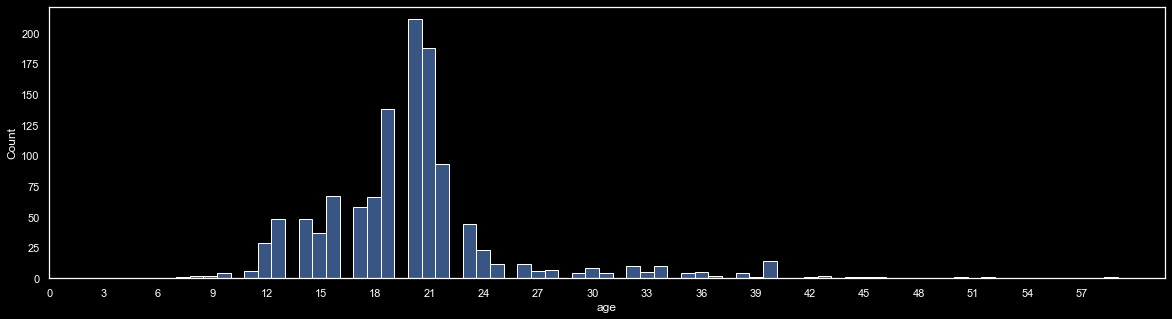

In [167]:
sns.histplot(x= 'age', data= df,)
plt.xticks(range(0, df.age.max() + 1, 3));

There are more students in our data who are adults.

In [42]:
non_ads = df[df.age < 18].age.count()
ads = df[df.age >= 18].age.count()

print("Non_adults: ", non_ads)
print("Adults: ", ads)

Non_adults:  302
Adults:  880


### Q2. Average class time that students have studied 

In [43]:
df.class_time.describe()

count    1182.000000
mean        3.208841
std         2.101756
min         0.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        10.000000
Name: class_time, dtype: float64

Averagely students are studying for `~3` hours and the max is 10 hours.

#### Adding a column to determine if the student is adult or not 

In [44]:
df.insert(2, "adultness", df.age.apply(lambda x: False if x < 18 else True ))
df.sample(2)

,location,age,adultness,class_time,rate,medium,self_study_time,fitness_time,sleep_time,social_time,social,tv_time,meals,weight,health_iss,free_mind,produ_time,connected_ffr,miss
524,Delhi-NCR,24,True,0.0,Good,Laptop/Desktop,1.0,0.0,10.0,6.0,Instagram,3,4,Increased,NO,Listening to music,NO,NO,School/college
1062,Outside Delhi-NCR,30,True,2.0,Very poor,Laptop/Desktop,0.0,1.0,8.0,1.0,Youtube,8,4,Increased,NO,Watching web series,NO,NO,NOTHING


In [171]:
df.groupby('adultness').class_time.mean()

adultness
False    4.339570
True     2.820795
Name: class_time, dtype: float64

Wow! Adults are not taking class so much that non adults are taking...!   <br>
Let's see where do they 'waste' their time...

In [172]:
df.groupby('adultness')[['class_time', 'self_study_time', 'fitness_time', 'social_time']].mean()

,class_time,self_study_time,fitness_time,social_time
adultness,,,,
False,4.339570,2.829470,0.838742,1.699834
True,2.820795,2.939773,0.740795,2.594205


It seems that averagely, adults are spending more time on the social media about `20%` more than non adults

### Q3. What medium is used the most in learning? 

<AxesSubplot:xlabel='medium', ylabel='count'>

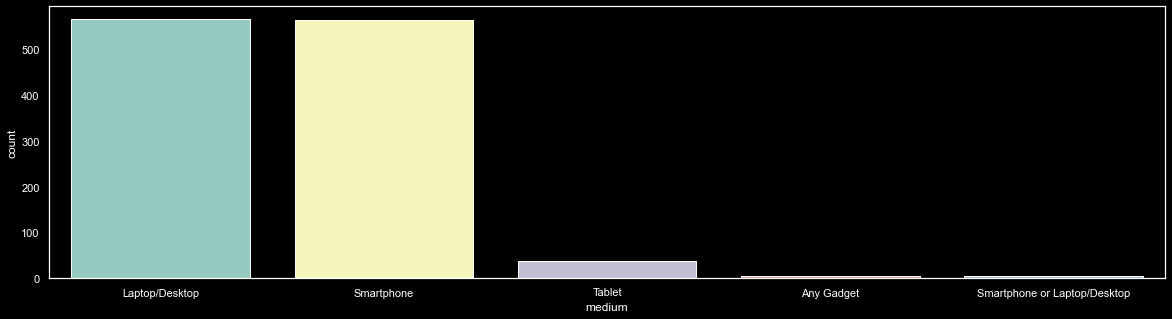

In [173]:
sns.countplot(x= 'medium', data= df)

In [174]:
df.groupby('medium').class_time.mean()

medium
Any Gadget                      5.000000
Laptop/Desktop                  3.347085
Smartphone                      2.997163
Smartphone or Laptop/Desktop    4.200000
Tablet                          4.184211
Name: class_time, dtype: float64

Mostly, people with Laptop are tend to learn more than smarphone users. And mostly there is no big difference between smartphone and laptop users, but here we can see who are giving their ratings more than on or another...

In [175]:
df.groupby(['medium', 'rate'])['location'].count().unstack()

rate,Average,Excellent,Good,Poor,Very poor
medium,,,,,
Any Gadget,1.0,NaN,3.0,NaN,1.0
Laptop/Desktop,205.0,44.0,117.0,11.0,189.0
Smartphone,175.0,48.0,100.0,19.0,222.0
Smartphone or Laptop/Desktop,1.0,2.0,1.0,1.0,NaN
Tablet,8.0,5.0,14.0,NaN,11.0


There is no big difference that the devices are making, but if we see, the desktop users have given better ratings than the smartphone users. But if we not consider this, will be fine. No big difference.

### Q4. Which solcial media is used the most? 

<AxesSubplot:xlabel='count', ylabel='social'>

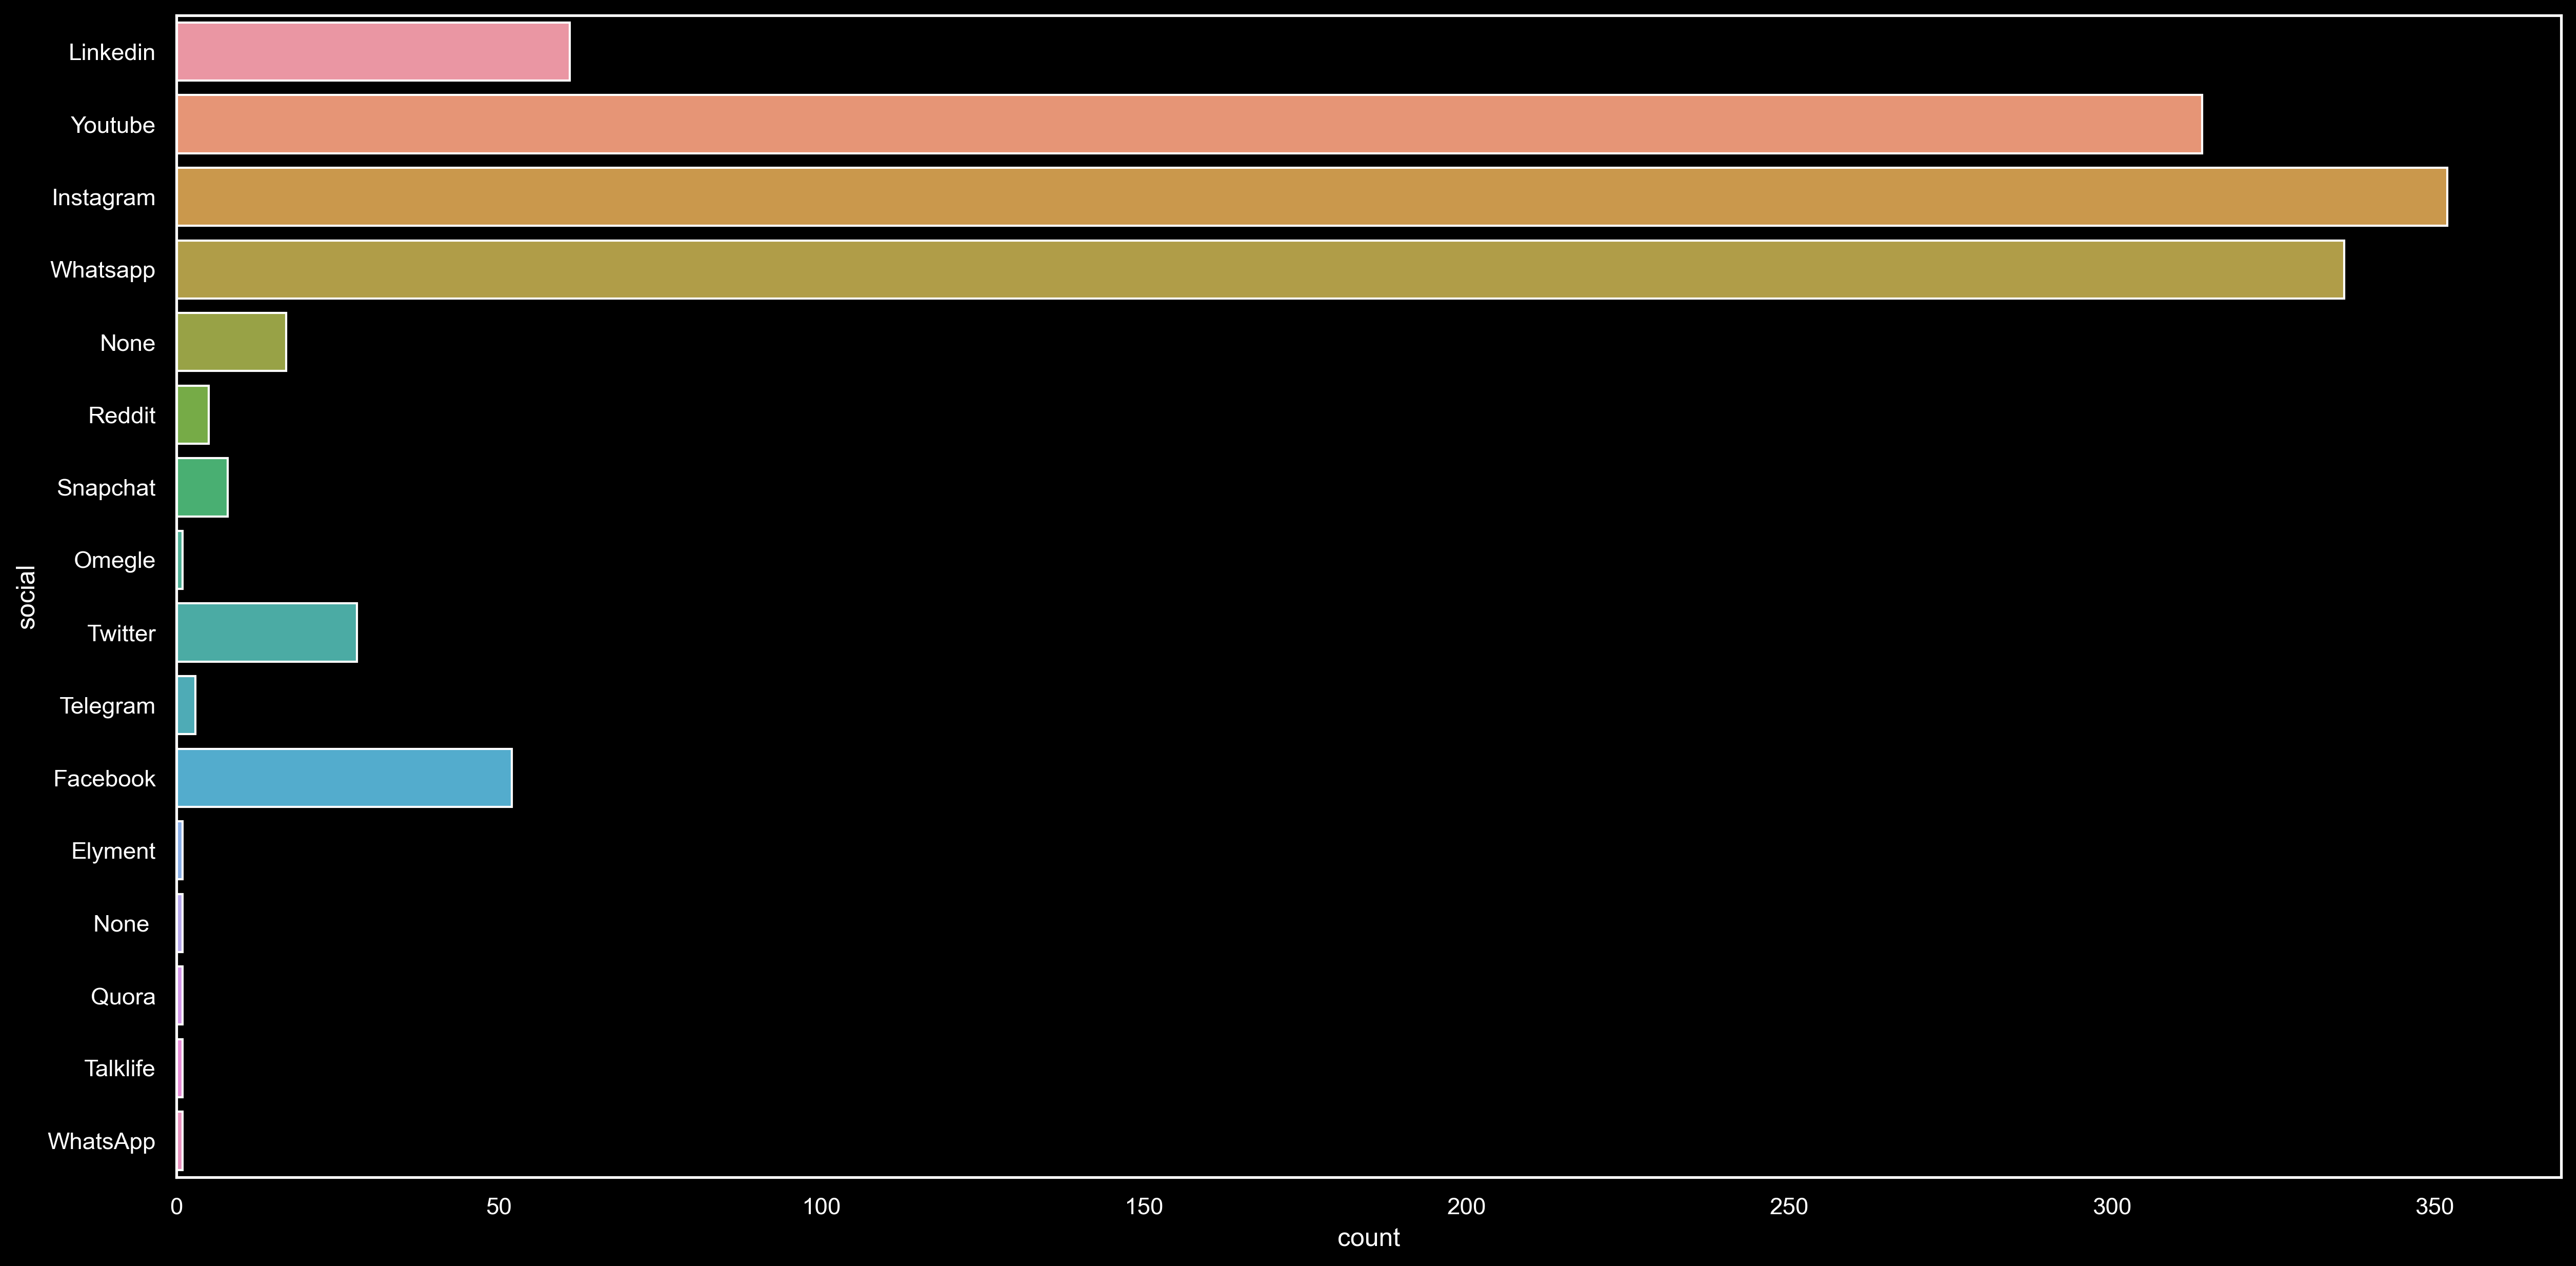

In [176]:
plt.figure(figsize= (20, 10), dpi= 300)
sns.countplot(y= 'social', data= df)

#####  There is the difference Whatsapp spelling, as, it is not a huge difference, we can ignore and move ahead

Hah! Instagram is used the most. Let's check age wise...

<AxesSubplot:xlabel='count', ylabel='social'>

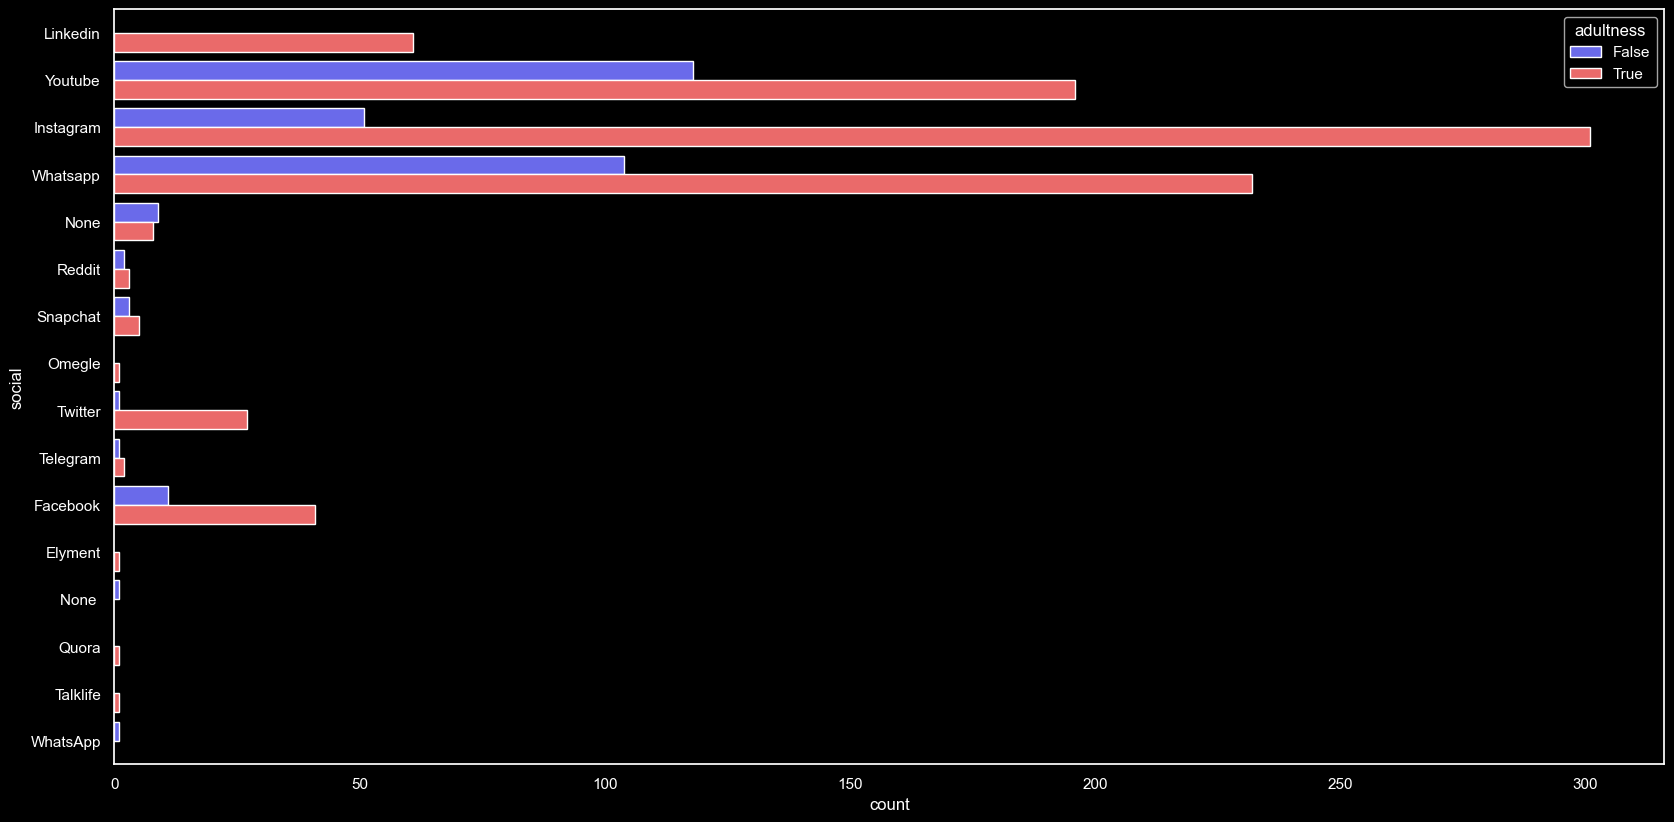

In [177]:
plt.figure(figsize= (20, 10), dpi= 100)
sns.countplot(y= 'social', data= df, hue= 'adultness', palette= 'seismic')

Adults are darasticly, using the Social network! And morethan half traffic in instagram - is from adults, making whatsapp the second.

Non, adults are not so surprisingly low in using Instagram they are also in considerable amount.
___
The highest usage of the social media in the non adult is YouTube. <br>
And there in `NONE` non adults are the highest.
___
LinkedIn is not used at all by the Non adults. Which is reasonable.

# 

### Q5. What do students usually do in their free time? 

In [20]:
free_minds = df.free_mind.value_counts()[:20].index
free_minds

Index(['Listening to music', 'Online gaming', 'Watching web series',
       'Reading books', 'Scrolling through social media', 'Sleeping',
       'Online surfing', 'Meditation', 'Cooking', 'Talking to your relatives',
       'Sleep', 'Dancing', 'Social Media', 'Web Series', 'Talking', 'Reading',
       'Exercise', 'Painting', 'Gym', 'Youtube'],
      dtype='object')

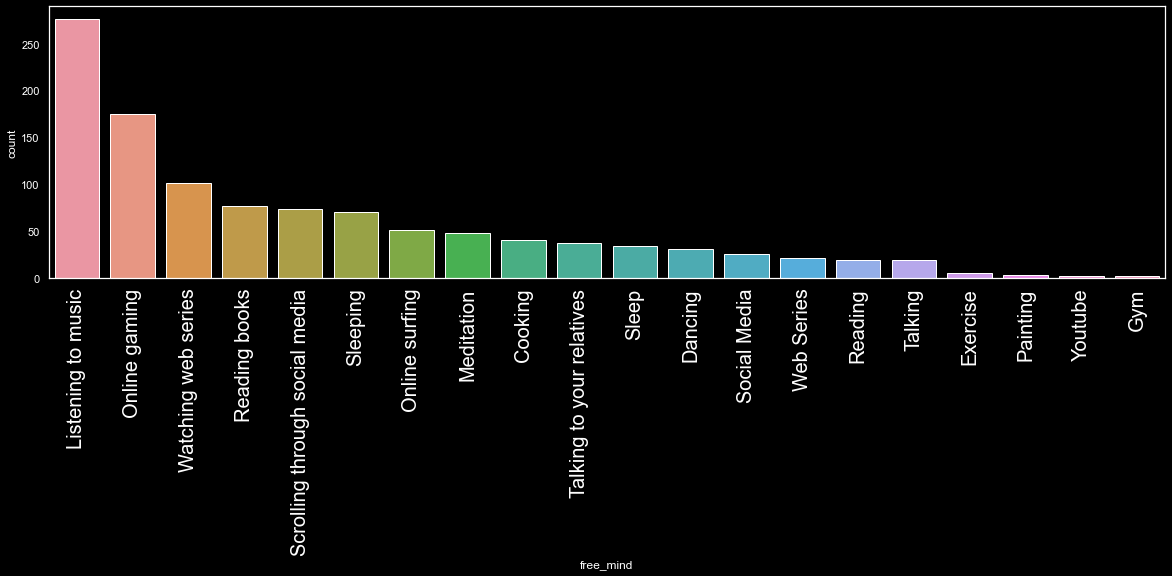

In [179]:
sns.countplot(x= 'free_mind', data= df[df.free_mind.isin(free_minds)], order= free_minds)
plt.xticks(rotation= 'vertical', size= 20);

It is common, most of the people are drawn towards Listening to the music and leading to Gaming on the second place then the online series.

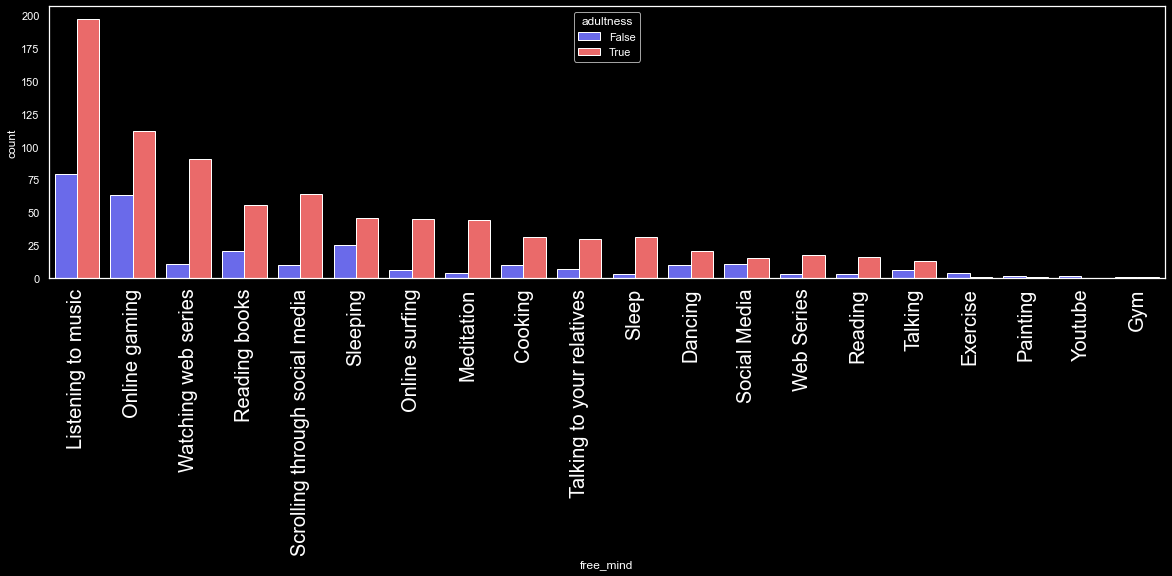

In [180]:
sns.countplot(x= 'free_mind', data= df[df.free_mind.isin(free_minds)], order= free_minds, hue= 'adultness', palette= 'seismic')
plt.xticks(rotation= 'vertical', size= 20);

### It is always that, adult will be doing more than the non adults, as of the data - but it would be more reasonable that if we make parts in our data age wise.<br> <br> 5-10, 10-15, ... 75-80

But later, in advanced part.

### Q6. How many of the students got healt issue during the time? 

<AxesSubplot:xlabel='count', ylabel='health_iss'>

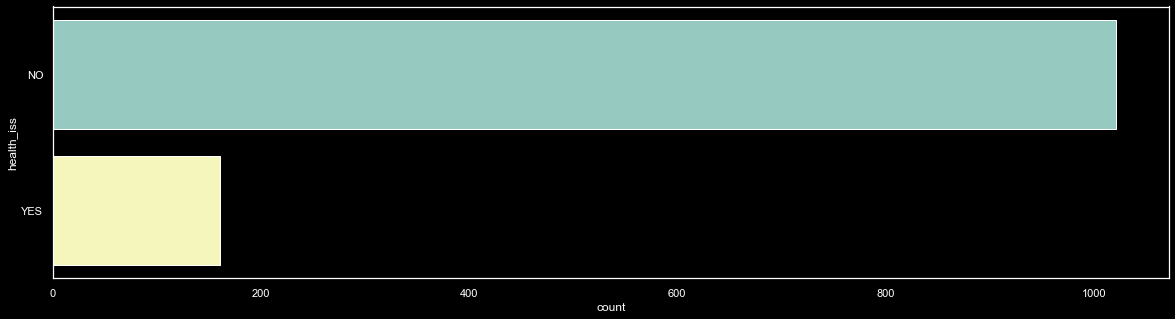

In [181]:
sns.countplot(y= "health_iss", data= df)

Looks like students were amazingly healthy during lockdown!

### Q7. What do students miss? 

In [21]:
def missing(value):
    if 'nothing' in value.lower():
        return 'Nothing'
    elif 'all' in value.lower() or 'everything' in value.lower():
        return 'All'
    elif 'friends' in value.lower() or 'friend' in value.lower():
        return 'Friends'
    else:
        return value

In [22]:
df.miss = df.miss.apply(missing)
miss = df.miss.value_counts()[:9].index

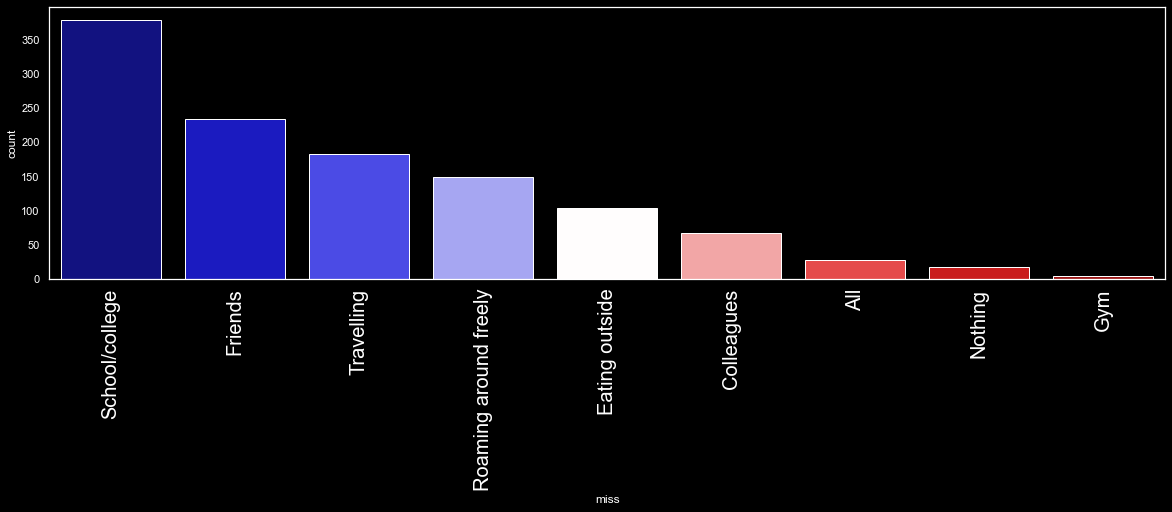

In [23]:
sns.countplot(x= 'miss', data= df[df.miss.isin(miss)], order= miss, palette= 'seismic')
plt.xticks(rotation= 'vertical', size= 20);

### `OOPS!` most of the students miss their school! (Personally I don't)

### Q8. Plot the time the students spend in different activities

In [24]:
df.sample(1)

,location,age,adultness,class_time,rate,medium,self_study_time,fitness_time,sleep_time,social_time,social,tv_time,meals,weight,health_iss,free_mind,produ_time,connected_ffr,miss
597,Delhi-NCR,18,True,4.0,Average,Laptop/Desktop,2.0,3.0,7.0,4.0,Instagram,1,2,Decreased,NO,Online surfing,NO,NO,School/college


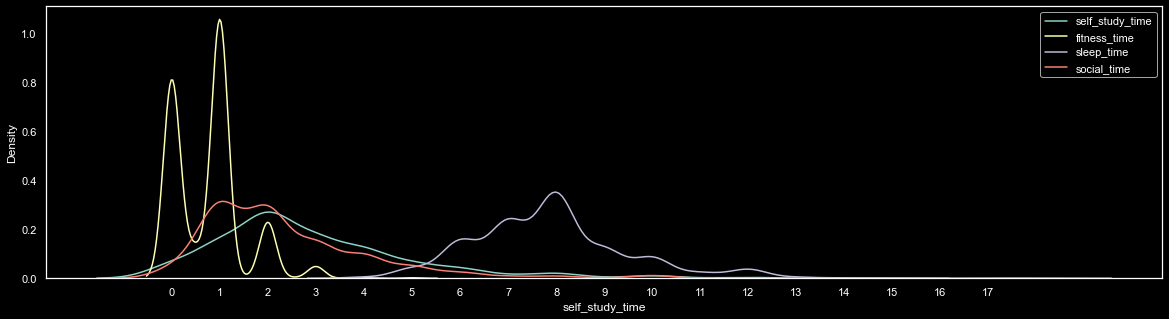

In [29]:
sns.kdeplot(x= 'self_study_time', data= df, fill= False, label= 'self_study_time')
sns.kdeplot(x= 'fitness_time', data= df, fill= False, label= 'fitness_time')
sns.kdeplot(x= 'sleep_time', data= df, fill= False, label= 'sleep_time')
sns.kdeplot(x= 'social_time', data= df, fill= False, label= 'social_time')

plt.xticks(range(0, 18))
plt.legend();

Not much interpretable? We do it covered more when I implement the pie chart

# 

# <center> `a bit` COMPLEX / RELATED QUESTION </center> 

# Q1. The students who are learning more, are from which medium? 

For this we will first find, what is more learning time? <br>
Look at the distribution of learning.

<AxesSubplot:xlabel='class_time', ylabel='Density'>

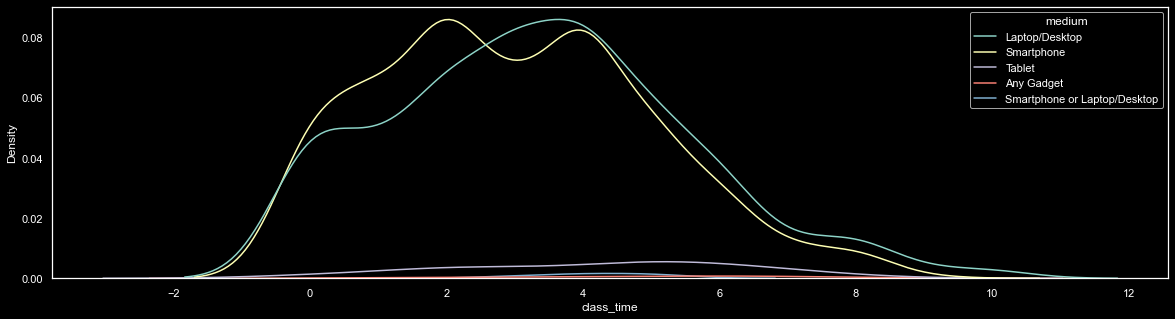

In [187]:
sns.kdeplot(x= 'class_time', data= df, hue= 'medium')

Here we can see the learners who are learning more than 6hrs are less, comparision to who learn less than 6hrs... that doesn't mean anything.

Instead we should skip this question as it doesn't provide any actionable insight.

## Q2. How do students rate their class? Is time or medium influence the rating?

In [188]:
df.sample(1)

,location,age,adultness,class_time,rate,medium,self_study_time,fitness_time,sleep_time,social_time,social,tv_time,meals,weight,health_iss,free_mind,produ_time,connected_ffr,miss
48,Delhi-NCR,21,True,3.0,Very poor,Laptop/Desktop,4.0,2.0,8.0,2.0,Twitter,0,4,Increased,NO,Listening to music,YES,YES,Travelling


<AxesSubplot:xlabel='rate', ylabel='count'>

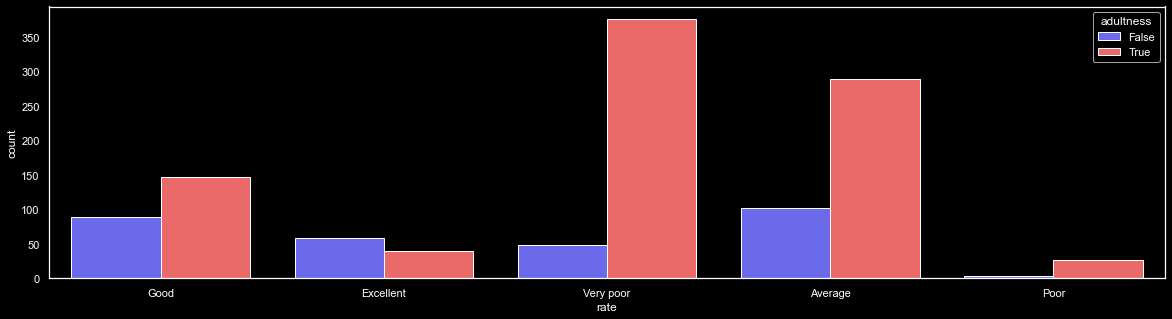

In [189]:
# Common rates
sns.countplot(x= 'rate', data= df, hue= 'adultness', palette= 'seismic')

Looks like adults are not having so much satisfation from online learning.

    The excellent score goes more in non adults, so online learning is working good in those age group.
It is always better to see rates percentage wise...

In [190]:
(pd.crosstab(df.adultness, df.rate, normalize= 'index') * 100).round(1)

rate,Average,Excellent,Good,Poor,Very poor
adultness,,,,,
False,33.8,19.5,29.5,1.3,15.9
True,32.9,4.6,16.7,3.1,42.8


Of course, `42%` adults are not satisfied with the learning, it is such a big percentage... **let's find out why.**

In [191]:
df.sample(1)

,location,age,adultness,class_time,rate,medium,self_study_time,fitness_time,sleep_time,social_time,social,tv_time,meals,weight,health_iss,free_mind,produ_time,connected_ffr,miss
94,Delhi-NCR,20,True,2.0,Average,Smartphone,3.0,1.0,5.0,4.0,Instagram,1,3,Increased,NO,Listening to music,NO,YES,School/college


<AxesSubplot:xlabel='miss', ylabel='count'>

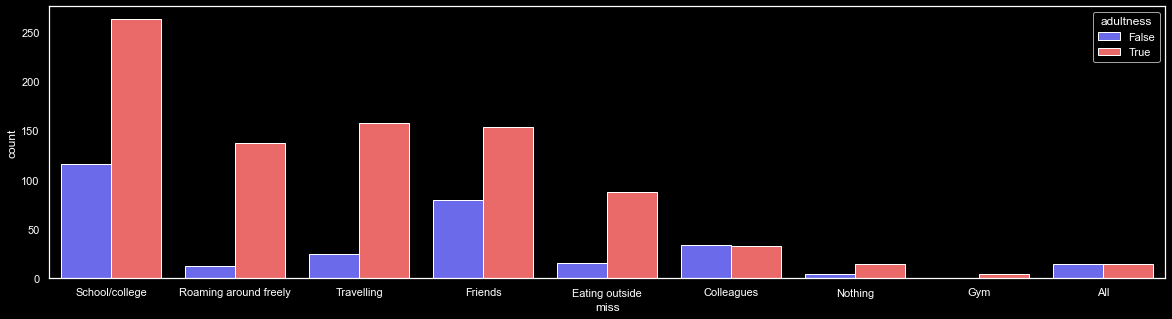

In [192]:
sns.countplot(x= 'miss', data= df[df.miss.isin(miss)], hue= 'adultness', palette= 'seismic')

### ADDED

In [193]:
(df[df.miss == 'School/college']['rate'].value_counts(normalize= True) * 100).round(1).apply(lambda x: str(x) + " %")

Average      34.3 %
Very poor    30.9 %
Good         21.9 %
Excellent    10.0 %
Poor          2.9 %
Name: rate, dtype: object

In [194]:
(pd.crosstab(temp.miss, temp.rate, normalize= 'columns') * 100).round(1).sort_values(by= 'Very poor', ascending= False)

rate,Very poor,Poor,Good,Average,Excellent
miss,,,,,
School/college,28.0,35.5,34.0,33.2,39.0
Friends,21.9,35.5,0.9,24.6,32.0
Roaming around freely,17.2,16.1,0.0,15.6,10.0
Travelling,13.9,6.5,27.7,12.8,7.0
Eating outside,12.5,0.0,5.1,8.2,7.0
Nothing,2.4,0.0,1.3,0.8,2.0
All,2.1,3.2,2.1,2.6,3.0
Internet,0.2,0.0,0.0,0.0,0.0
Previous mistakes,0.2,0.0,0.0,0.0,0.0


### Rating effect based on what do they miss

<AxesSubplot:xlabel='miss'>

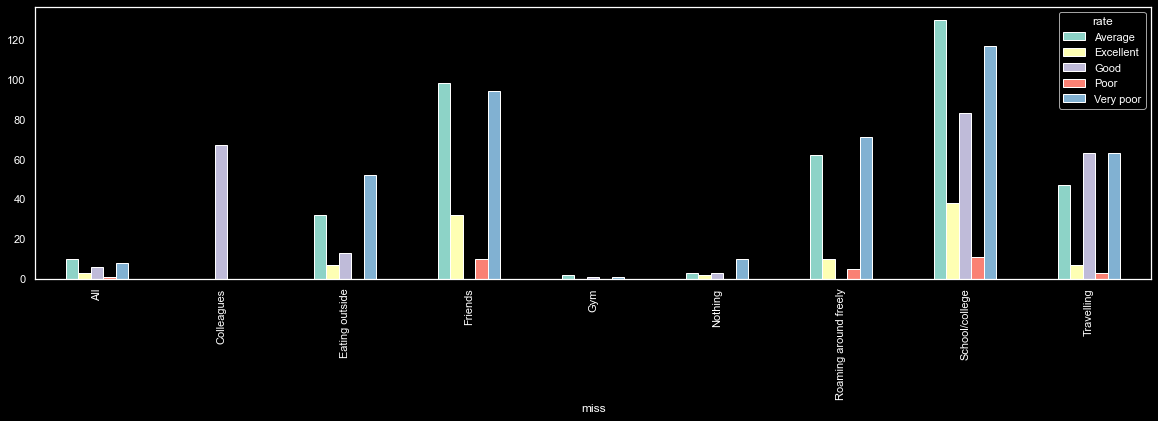

In [195]:
temp = df[df.miss.isin(miss)]
pd.crosstab(temp.miss, temp.rate).plot(kind= 'bar')

The common reason why they are doing this, `can be because of they are missing their school/college`. And this trend is looking clear from the graph above.

Coming to the question, *Does time & medium influence rating?*
- **Means**: Is time of class study and medium related to good or bad rating?

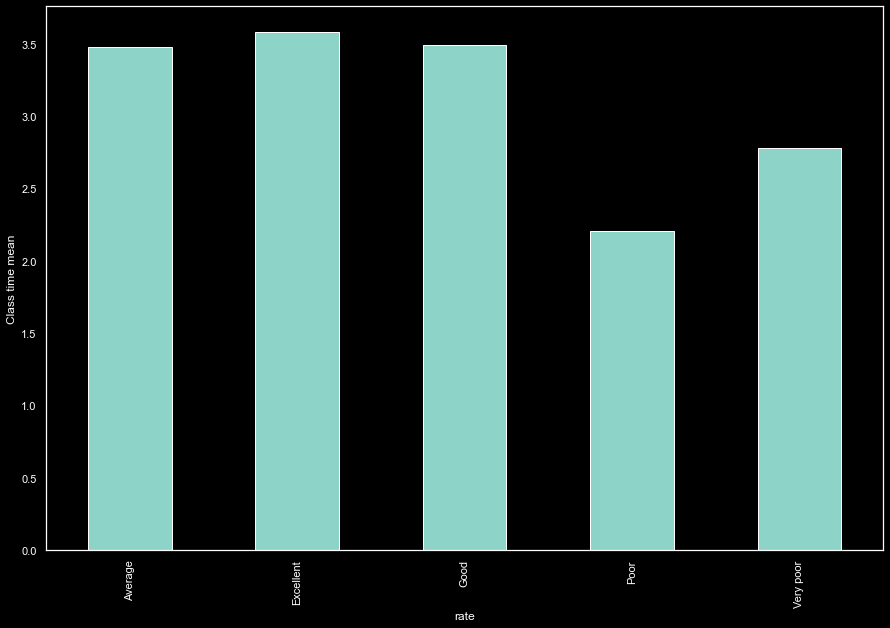

In [31]:
plt.figure(figsize= (15,10))
df.groupby('rate')['class_time'].mean().plot(kind= 'bar')
plt.ylabel('Class time mean');

<AxesSubplot:xlabel='rate', ylabel='count'>

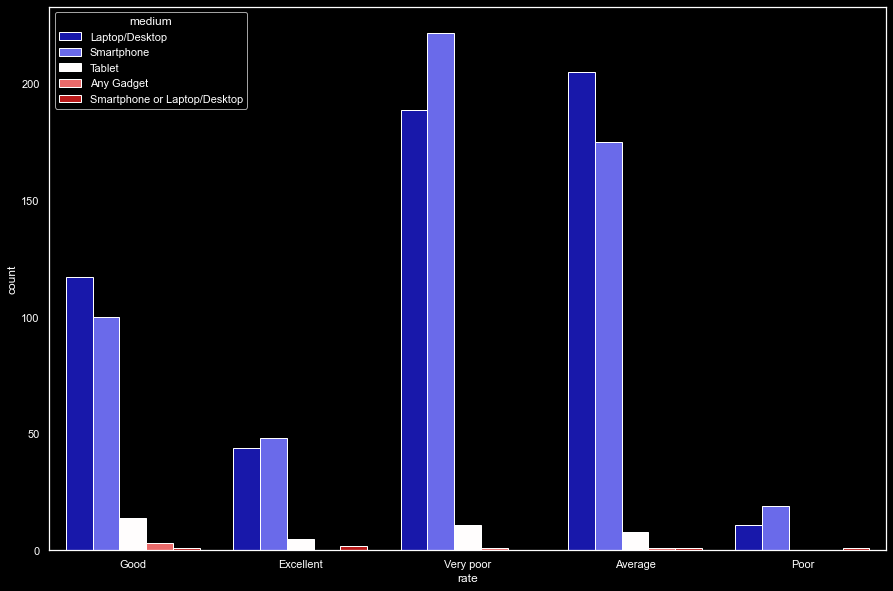

In [197]:
plt.figure(figsize= (15,10))
sns.countplot(x= 'rate', data= df, hue= 'medium', palette= 'seismic')

#### Big takeaway from this is that...
`Most of the Very Poor rating is from Smartphone users` and some `acceptable i.e Average, Good are from Desktop users`, that means **smartphone is making difference here**. Somehow, smartphone learners are not having satisfaction in their learning.

Not to forget that, overall the dislikes for the learning experience is from the desktop learners too, but in comparison to the smartphone users, it is lower.

Again, the percentage is the good measure to get an idea...

Here, I realized that, the rating column should have a datatype of Catgory and should be ordered...

In [32]:
df.rate = pd.Categorical(df.rate, ['Very poor', 'Poor', 'Good', 'Average', 'Excellent'], ordered= True)

In [33]:
(pd.crosstab(df.rate, df.medium, normalize= 'index') * 100).round(1).loc[:, ['Smartphone', 'Laptop/Desktop']]

medium,Smartphone,Laptop/Desktop
rate,,
Very poor,51.9,45.0
Poor,58.1,35.5
Good,42.1,49.8
Average,44.7,53.0
Excellent,46.9,45.9


And time...

In [200]:
df.groupby('rate')['class_time'].mean().round(2)

rate
Very poor    2.77
Poor         2.20
Good         3.48
Average      3.52
Excellent    3.55
Name: class_time, dtype: float64

Here is how my interpretation goes for this... Students who are having more classes, and use Desktop are tend to give better rating that is maybe because it is easy to focus, take notes and sit more while a student is on the desktop which leads to better experience - than the smartphone. 

Now, again if we want to further dive in to check the time duration is really a concern or not, we need to make the classes of time and then plot them out. Let's do that.

<AxesSubplot:xlabel='rate', ylabel='count'>

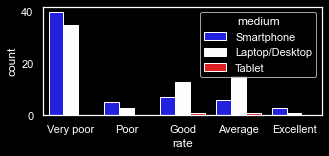

In [201]:
tmp = df[df.class_time == 0.0]

plt.figure(figsize= (5,2))
sns.countplot(x= 'rate', data= tmp, hue= 'medium', palette= 'seismic')

### And surprisingly, those students who are learning 0 hours, are more active in giving the rating as 'Poor'. Hah!

In [202]:
df.sample(5)

,location,age,adultness,class_time,rate,medium,self_study_time,fitness_time,sleep_time,social_time,social,tv_time,meals,weight,health_iss,free_mind,produ_time,connected_ffr,miss
579,Delhi-NCR,14,False,3.0,Average,Smartphone,2.0,2.0,7.0,2.0,Whatsapp,2,3,Remain Constant,NO,Online gaming,YES,NO,School/college
676,Delhi-NCR,19,True,0.0,Average,Laptop/Desktop,3.0,1.0,9.0,2.0,Instagram,0,2,Remain Constant,NO,Online gaming,NO,NO,Eating outside
901,Outside Delhi-NCR,29,True,10.0,Good,Laptop/Desktop,7.0,1.0,6.0,7.0,Whatsapp,2,2,Remain Constant,NO,Web Series,YES,YES,Eating outside
629,Delhi-NCR,16,False,1.0,Good,Smartphone,1.0,1.0,7.0,2.0,Youtube,2,2,Remain Constant,NO,Online gaming,YES,YES,School/college
71,Delhi-NCR,22,True,6.0,Very poor,Smartphone,4.0,0.0,7.0,2.0,Whatsapp,0,1,Increased,NO,Online gaming,NO,NO,Eating outside


In [203]:
df.class_time.max()

10.0

In [204]:
#Just adding classes of time
temp = pd.concat([df, pd.cut(df.class_time, 5).rename('time_class')], axis= 1)

In [205]:
temp.head()

,location,age,adultness,class_time,rate,medium,self_study_time,fitness_time,sleep_time,social_time,social,tv_time,meals,weight,health_iss,free_mind,produ_time,connected_ffr,miss,time_class
0,Delhi-NCR,21,True,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,Linkedin,1,4,Increased,NO,Cooking,YES,YES,School/college,"(-0.01, 2.0]"
1,Delhi-NCR,21,True,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,Youtube,0,3,Decreased,NO,Scrolling through social media,YES,NO,Roaming around freely,"(-0.01, 2.0]"
2,Delhi-NCR,20,True,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,Linkedin,0,3,Remain Constant,NO,Listening to music,NO,YES,Travelling,"(6.0, 8.0]"
3,Delhi-NCR,20,True,3.0,Very poor,Smartphone,2.0,1.0,6.0,5.0,Instagram,0,3,Decreased,NO,Watching web series,NO,NO,Friends,"(2.0, 4.0]"
4,Delhi-NCR,21,True,3.0,Good,Laptop/Desktop,3.0,1.0,8.0,3.0,Instagram,1,4,Remain Constant,NO,Social Media,NO,NO,Travelling,"(2.0, 4.0]"


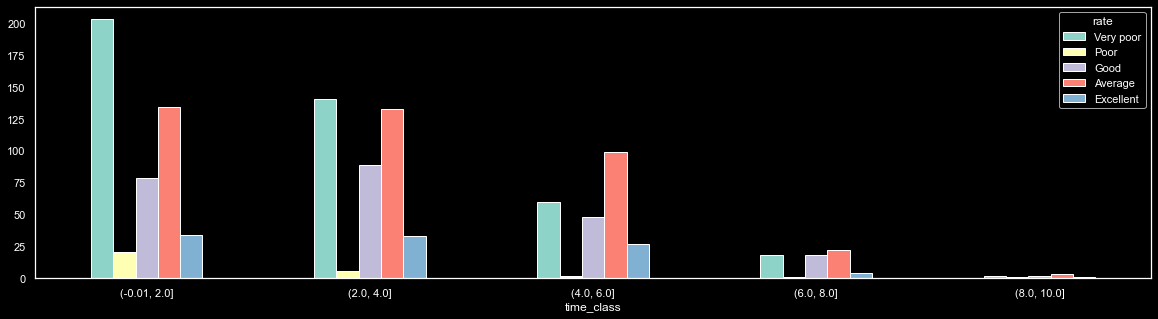

In [206]:
pd.crosstab(temp.time_class, temp.rate).plot(kind= 'bar')
plt.xticks(rotation= 'horizontal');

See? Students who are not learning i.e learning for just 2 or less hours are more to give negative feedback, as their learning time increases, the feedback quality increases as well, but not giving Excellent in any mode. 

# 

## Q3. The effect on rating, what is affecting - Students whose class time is better or those who are more active on social media?

Again, for this, we need to make the classes for both times. Let's do that.

In [207]:
temp = pd.concat([temp, pd.cut(df.social_time, 5).rename('time_social')], axis=1)
temp.sample(5)

,location,age,adultness,class_time,rate,medium,self_study_time,fitness_time,sleep_time,social_time,...,tv_time,meals,weight,health_iss,free_mind,produ_time,connected_ffr,miss,time_class,time_social
825,Outside Delhi-NCR,20,True,4.0,Average,Laptop/Desktop,5.0,0.5,8.0,1.0,...,2,3,Increased,NO,Meditation,YES,YES,Friends,"(2.0, 4.0]","(-0.01, 2.0]"
988,Outside Delhi-NCR,21,True,2.0,Average,Laptop/Desktop,1.0,0.0,12.0,3.0,...,0,2,Increased,NO,Listening to music,NO,YES,School/college,"(-0.01, 2.0]","(2.0, 4.0]"
1145,Outside Delhi-NCR,13,False,6.0,Good,Smartphone,2.0,0.0,11.0,1.0,...,0.5,3,Remain Constant,NO,Online gaming,YES,YES,Colleagues,"(4.0, 6.0]","(-0.01, 2.0]"
24,Delhi-NCR,20,True,3.0,Very poor,Smartphone,4.0,2.0,9.0,2.0,...,1,3,Decreased,NO,Reading books,YES,NO,School/college,"(2.0, 4.0]","(-0.01, 2.0]"
363,Delhi-NCR,17,False,6.0,Average,Laptop/Desktop,2.5,1.0,6.0,0.0,...,0.5,3,Remain Constant,NO,Reading books,YES,YES,Roaming around freely,"(4.0, 6.0]","(-0.01, 2.0]"


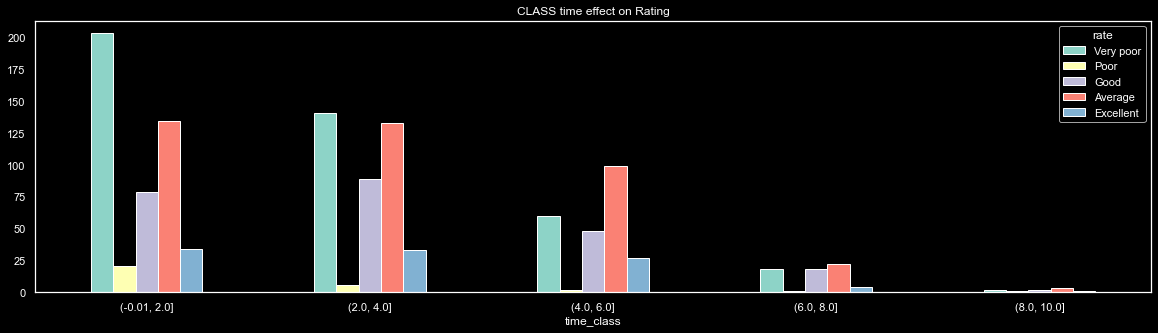

In [208]:
pd.crosstab(temp.time_class, temp.rate).plot(kind= 'bar')
plt.title("CLASS time effect on Rating")
plt.xticks(rotation= 'horizontal');

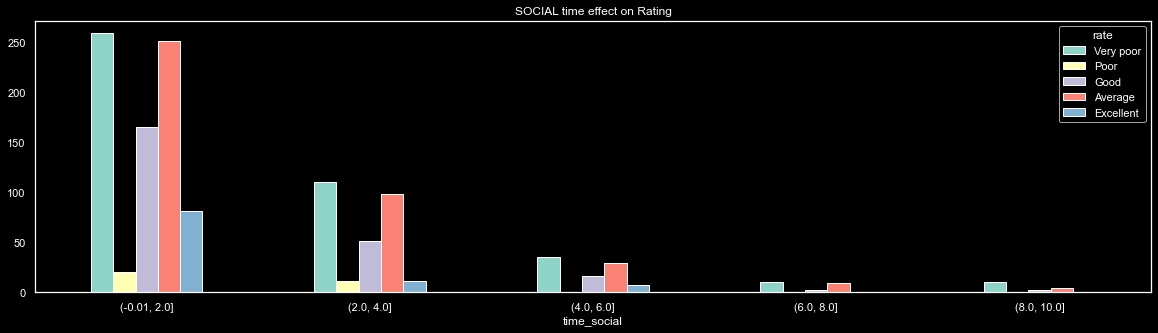

In [209]:
pd.crosstab(temp.time_social, temp.rate).plot(kind= 'bar')
plt.title("SOCIAL time effect on Rating")
plt.xticks(rotation= 'horizontal');

Here we see that, people who are `less active on social media`, are giving mix reviews but in general, `average and good reviews are also coming from them`, so that means, the majority of the students who are enjoying the classe i.e giving Average or Good reviews, are spending less time on social media and majority of votes for rating comes from them. They tend to rate more.

**On the flip side**, <u> the more students, who are learning they are giving better reviews. </u> <br>
And another thing to notice here is that, pepole who are giving more time - either in social or learning are less comparision to those who are spend in less time in both sides.

### The conclusion is - Learn more, Social less, be productive.
____

#### Q4 was wrongly written. Skipped

## Q5. What is causing increase in the weight? 

To interpret this, we can say that - The relation between the meals they take and hours they sit (class time + social time + self study + sleep)

In [47]:
sitting_hrs = df.sleep_time + df.social_time + df.class_time + df.self_study_time
temp1 = pd.concat([df, sitting_hrs.rename('sitting_hrs')], axis= 1)
temp1.sample(2)

,location,age,adultness,class_time,rate,medium,self_study_time,fitness_time,sleep_time,social_time,social,tv_time,meals,weight,health_iss,free_mind,produ_time,connected_ffr,miss,sitting_hrs
218,Delhi-NCR,19,True,0.5,Very poor,Smartphone,5.0,0.5,10.0,1.0,Whatsapp,1,2,Remain Constant,YES,Meditation,YES,NO,School/college,16.5
559,Delhi-NCR,18,True,3.0,Good,Smartphone,2.0,0.0,8.0,1.0,Youtube,1,3,Decreased,NO,Listening to music,YES,NO,School/college,14.0


In [48]:
temp1.sitting_hrs = temp1.sitting_hrs.apply(lambda x: 24 if x > 24 else x)
temp1.sitting_hrs = temp1.sitting_hrs.apply(round)

In [49]:
temp1.sitting_hrs.value_counts().sort_index()

7       1
8       7
9       7
10     25
11     36
12     66
13     83
14    132
15    120
16    141
17    147
18    143
19     92
20     71
21     38
22     28
23     10
24     35
Name: sitting_hrs, dtype: int64

Text(0.5, 1.0, 'Sitting Hour with SLEEP time')

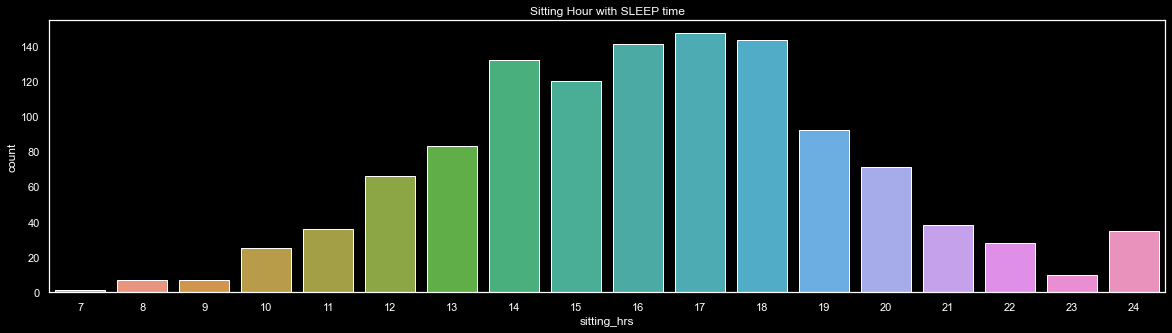

In [50]:
sns.countplot(x= 'sitting_hrs', data= temp1)
plt.title("Sitting Hour with SLEEP time")

If we ignore the sleeping time... then

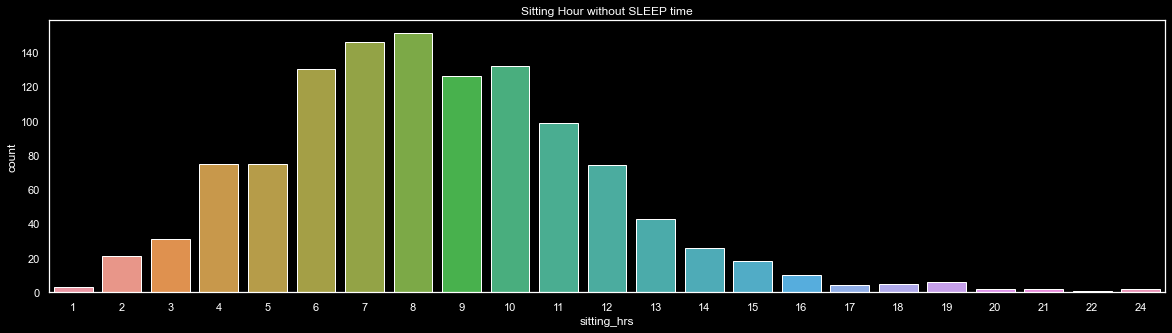

In [51]:
sitting_hrs = df.social_time + df.class_time + df.self_study_time
temp2 = pd.concat([df, sitting_hrs.rename('sitting_hrs')], axis= 1)

temp2.sitting_hrs = temp2.sitting_hrs.apply(lambda x: 24 if x > 24 else x)
temp2.sitting_hrs = temp2.sitting_hrs.apply(round)
sns.countplot(x= 'sitting_hrs', data= temp2)
plt.title("Sitting Hour without SLEEP time");

Graph changes suddenly! So, let's *not consider sleep time for now.*

Next up, we will see - that if weight increase, decrease is related with more sitting or not (exercise will also be contributed soon)

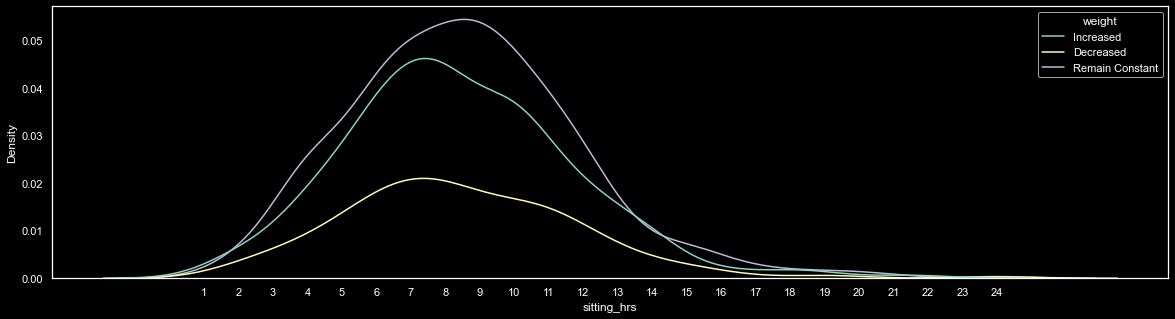

In [62]:
sns.kdeplot(x= "sitting_hrs", data= temp2, hue= 'weight')
plt.xticks(range(1, 25));

At a glance, students who are sitting morethan 6 hours are tend to have the weight increase, but there we can't see a clear cut because more than those who have reported that their weight has increased if they sit more, `there are those whose weight has remain the same and even sitting more than 6 hours.` **So here, also is not a clear explanation of relation**
between sitting and weight increase, decrese.

In [63]:
(pd.crosstab(temp2.sitting_hrs, temp2.weight, normalize= 'columns') * 100).round(1)

weight,Decreased,Increased,Remain Constant
sitting_hrs,,,
1,0.0,0.5,0.2
2,2.4,2.1,1.3
3,3.3,2.3,2.6
4,4.8,5.7,7.5
5,7.2,6.8,5.6
6,11.5,11.2,10.7
7,12.9,13.2,11.4
8,13.4,13.7,11.8
9,8.6,8.7,13.1


What about their meal?

<AxesSubplot:xlabel='meals', ylabel='count'>

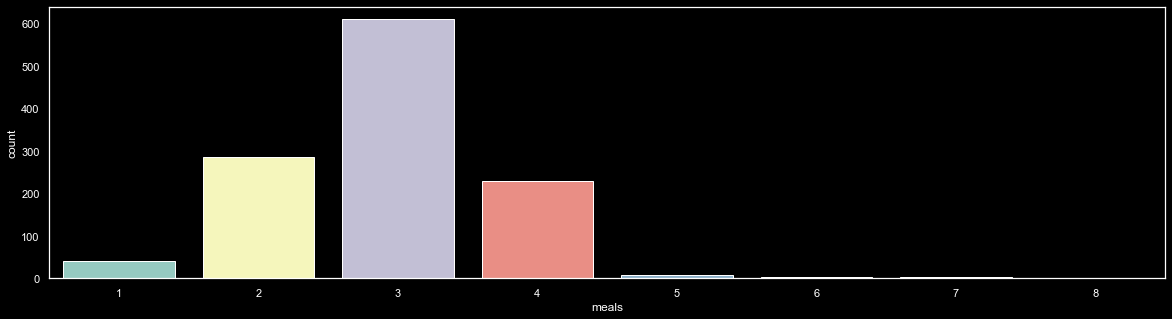

In [128]:
sns.countplot(x= 'meals', data= df)

<AxesSubplot:xlabel='meals'>

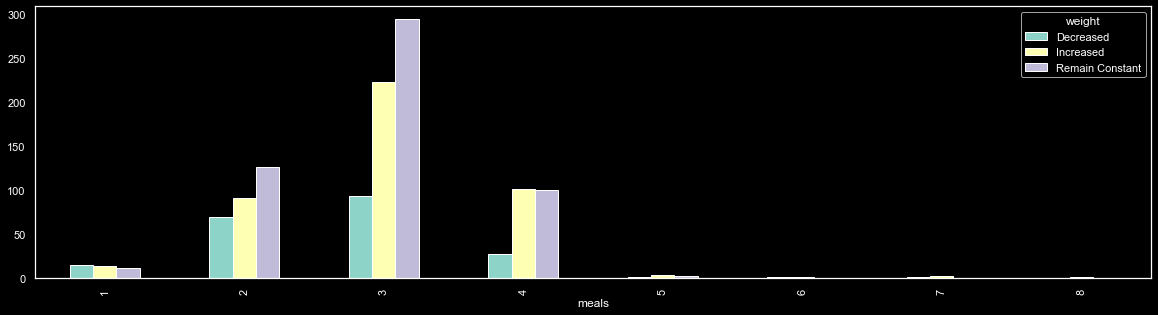

In [129]:
pd.crosstab(df.meals, df.weight).plot(kind= 'bar')

The weight has increased when they take meal for 3 times a day - `but that's normal` so the number of people whose weight has remain the same is also high. 

What about those whose weight has decreased? They seem to be less impective in all cases. 

In [130]:
#Overall this is the weight distribution during lockdown
(df.weight.value_counts(normalize= True) * 100).round(2).apply(lambda x: str(x) + " %")

Remain Constant    45.26 %
Increased          37.06 %
Decreased          17.68 %
Name: weight, dtype: object

# 

## Q6. Is fitness timing providing any advantage over weight?

In [66]:
df.fitness_time = df.fitness_time.apply(lambda x: round(x))

<AxesSubplot:xlabel='fitness_time'>

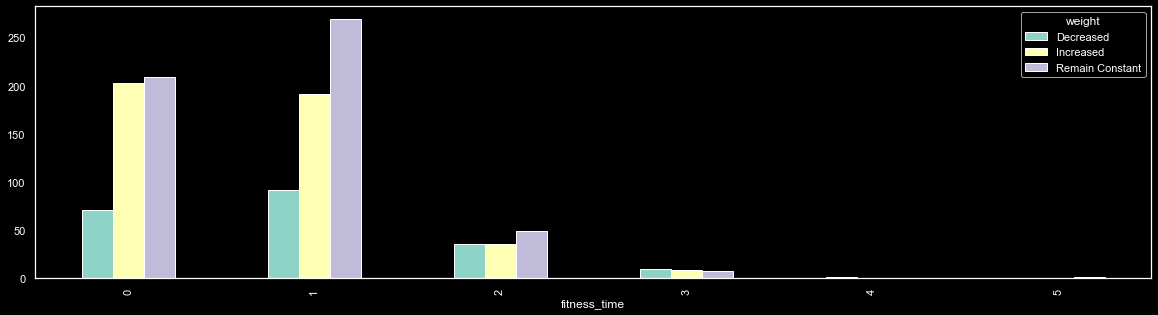

In [68]:
pd.crosstab(df.fitness_time, df.weight).plot(kind= 'bar')

## `Aah!!! Finally` we see somewhere the real world relationship that by giving the fitness time of 3 hours, the weight has decreased!

Meal + Extercise

In [89]:
temp = df[df.meals.isin([1,2,3,4])].copy()
(pd.crosstab([temp.fitness_time, temp.meals], temp.weight, normalize= 'columns') * 100).round(1).sort_values(by= 'Increased', ascending= False).iloc[:15]

weight              Decreased  Increased  Remain Constant
fitness_time meals                                       
0            3           17.0       25.4             22.7
1            3           19.9       22.8             26.5
0            2           12.1       11.0             11.1
1            4            6.3       10.3             12.0
             2           14.1        9.1             10.7
0            4            3.9        8.9              4.1
2            3            6.8        3.3              5.1
             4            2.9        3.3              2.4
0            1            1.5        1.6              1.3
1            1            3.9        1.4              0.9
2            2            6.3        1.2              1.7
3            4            0.5        1.2              0.2
             3            1.5        0.5              0.8
2            1            0.5        0.2              0.0
3            2            1.5        0.0              0.2

Meal + Extercise + Sitting

In [87]:
temp = temp2[temp2.meals.isin([1,2,3,4])].copy()
temp.fitness_time =  temp.fitness_time.apply(lambda x: round(x))
(pd.crosstab([temp.fitness_time, temp.meals, temp.sitting_hrs], temp.weight, normalize= 'columns') * 100).round(1).sort_values(by= 'Increased', ascending= False).iloc[:15]

weight                          Decreased  Increased  Remain Constant
fitness_time meals sitting_hrs                                       
0            3     7                  1.5        4.9              2.6
1            3     7                  3.4        3.3              3.4
                   8                  2.4        3.3              3.4
0            3     10                 1.0        3.3              2.8
1            3     10                 2.9        3.0              2.8
                   9                  1.0        2.6              3.6
0            3     6                  2.4        2.6              2.8
1            3     4                  0.5        2.3              1.3
0            3     8                  1.9        2.3              2.6
                   5                  1.5        2.3              0.8
1            3     11                 2.4        1.9              3.0
             4     7                  1.5        1.6              1.1
             3     5                  0.0        1.6              1.7
0            3     11                 1.0        1.6              1.3
                   9                  1.5        1.6              3.4

# 

## Q7. Are students connected with family if they are active on social media?

We will take this in three ways, 
1. Compare students based on `mean` social media time
2. Compare students based on `mean` social media time adultness wise
3. Overall relation but time class wise

In [95]:
social_mean = df.social_time.mean()
social_mean

2.3656937394247044

In [93]:
df.social_time.describe()

count    1182.000000
mean        2.365694
std         1.767336
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        10.000000
Name: social_time, dtype: float64

### From the distribution of social media time, shown above - It is `acceptable` to take mean as a division point as it has ~2 hrs of std and values rangin between 0 to 10
And also 25% and 75% values are near to mean.

In [96]:
temp = df.copy()
temp['social_animal'] = temp.social_time.apply(lambda x: 'Too much' if x > social_mean else 'Okay')
temp.head()

,location,age,adultness,class_time,rate,medium,self_study_time,fitness_time,sleep_time,social_time,social,tv_time,meals,weight,health_iss,free_mind,produ_time,connected_ffr,miss,social_animal
0,Delhi-NCR,21,True,2.0,Good,Laptop/Desktop,4.0,0,7.0,3.0,Linkedin,1,4,Increased,NO,Cooking,YES,YES,School/college,Too much
1,Delhi-NCR,21,True,0.0,Excellent,Smartphone,0.0,2,10.0,3.0,Youtube,0,3,Decreased,NO,Scrolling through social media,YES,NO,Roaming around freely,Too much
2,Delhi-NCR,20,True,7.0,Very poor,Laptop/Desktop,3.0,0,6.0,2.0,Linkedin,0,3,Remain Constant,NO,Listening to music,NO,YES,Travelling,Okay
3,Delhi-NCR,20,True,3.0,Very poor,Smartphone,2.0,1,6.0,5.0,Instagram,0,3,Decreased,NO,Watching web series,NO,NO,Friends,Too much
4,Delhi-NCR,21,True,3.0,Good,Laptop/Desktop,3.0,1,8.0,3.0,Instagram,1,4,Remain Constant,NO,Social Media,NO,NO,Travelling,Too much


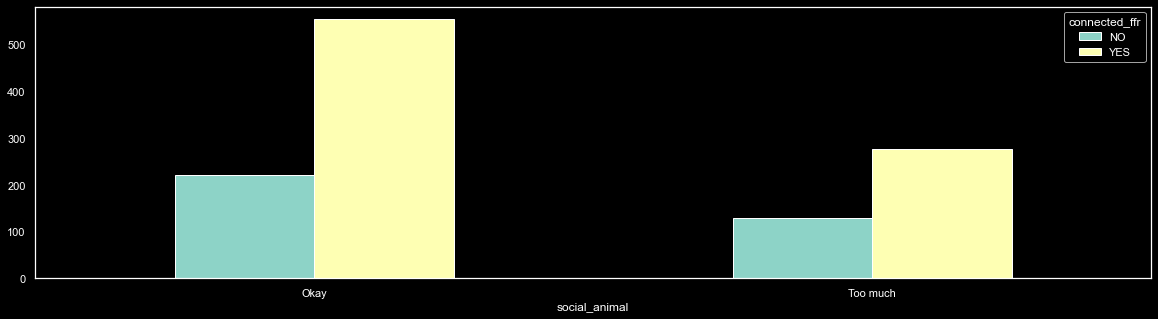

In [97]:
pd.crosstab(temp.social_animal, temp.connected_ffr).plot(kind= 'bar')
plt.xticks(rotation= 'horizontal');

See? On an average, students who are using social media less than 2.7 hours a day are more connected with their families.

#### To support hypothesis...

In [104]:
hypothesis = (pd.crosstab(temp.social_animal, temp.connected_ffr, normalize= 'index') * 100).round(1)
hypothesis['diff'] = abs(hypothesis.NO - hypothesis.YES)
hypothesis

connected_ffr,NO,YES,diff
social_animal,,,
Okay,28.6,71.4,42.8
Too much,31.8,68.2,36.4


Adultness?

<AxesSubplot:xlabel='social_animal,adultness'>

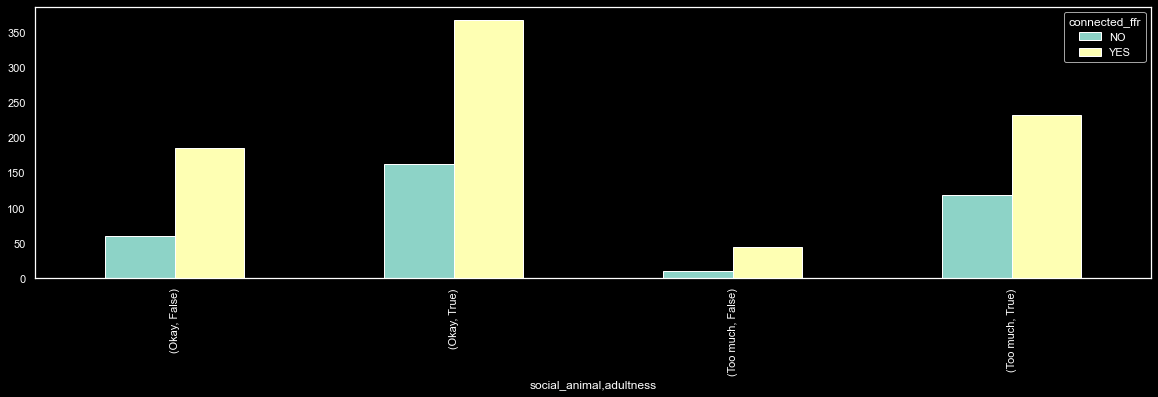

In [136]:
temp.groupby(['social_animal', 'adultness', 'connected_ffr'])['location'].count().unstack().plot(kind= 'bar')

Nothing special

## NEED Mam's point here... why?
What to interpret here?

<AxesSubplot:xlabel='social_time'>

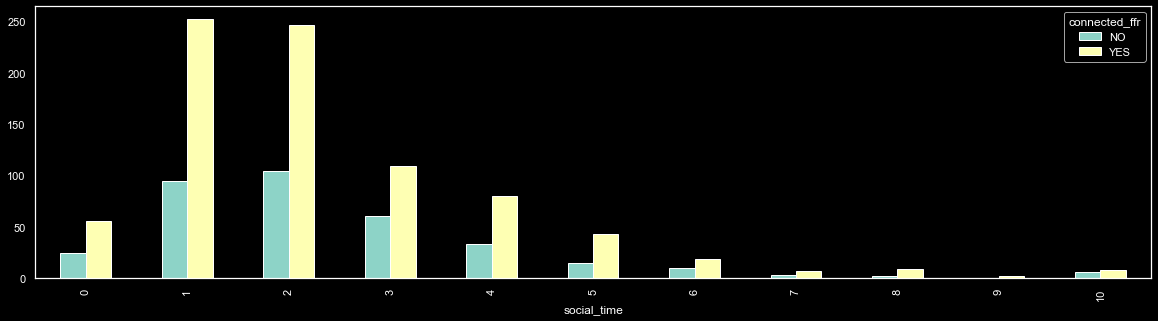

In [105]:
pd.crosstab(temp.social_time.apply(lambda x: round(x)), temp.connected_ffr).plot(kind= 'bar')

If we start from 1, then we can see that the less they use social media, the more they enjoy with their family.

In [120]:
hypothesis = (pd.crosstab(temp.social_time.apply(lambda x: round(x)), temp.connected_ffr, normalize= 'index') * 100).round(1)
hypothesis['diff'] = abs(hypothesis.NO - hypothesis.YES)
hypothesis

connected_ffr,NO,YES,diff
social_time,,,
0,30.0,70.0,40.0
1,27.2,72.8,45.6
2,29.7,70.3,40.6
3,35.5,64.5,29.0
4,29.2,70.8,41.6
5,25.9,74.1,48.2
6,34.5,65.5,31.0
7,30.0,70.0,40.0
8,18.2,81.8,63.6


# 

## Q8. How the time is shared?

In [138]:
labels = df.iloc[:, [3, 6, 7, 8, 9]].columns
measures = df.iloc[:, [3, 6, 7, 8, 9]]

In [139]:
measures = measures.mean()

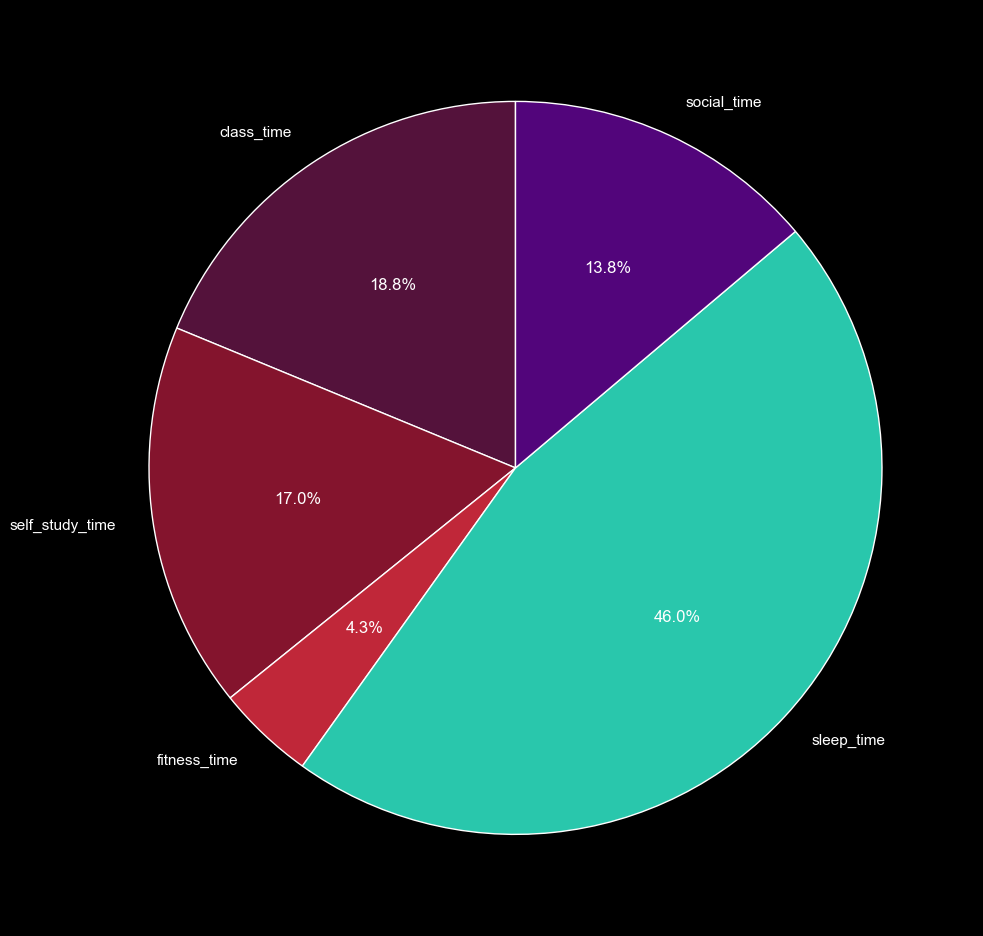

In [140]:
plt.figure(figsize= (10,10), dpi= 100)
plt.pie(measures, labels=labels, autopct='%1.1f%%', 
        startangle=90, colors= ["#54123b", "#84142d",
                                "#c02739", "#29c7ac",
                                "#52057b"])

plt.tight_layout()

People freaking sleeping more than they work right!

<AxesSubplot:xlabel='free_mind'>

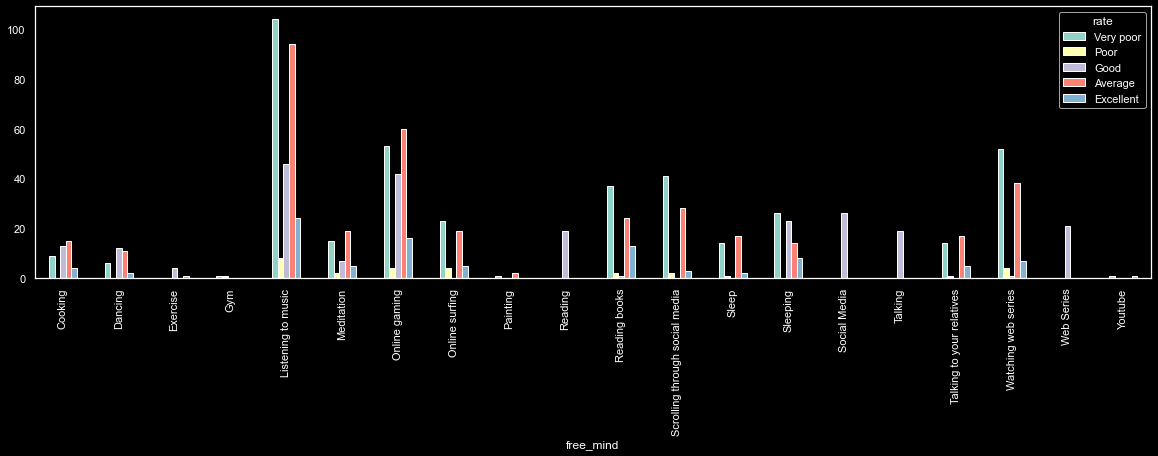

In [141]:
those = df[df.free_mind.isin(free_minds)]
pd.crosstab(those.free_mind, those.rate).plot(kind= 'bar')

Something here, something here! People who play games, are giving Average as the rate, but those who watch movies and listen to music are tend to give poor reviews, but also most average par comes from them. 

##  Q10. Age distribution based on the location

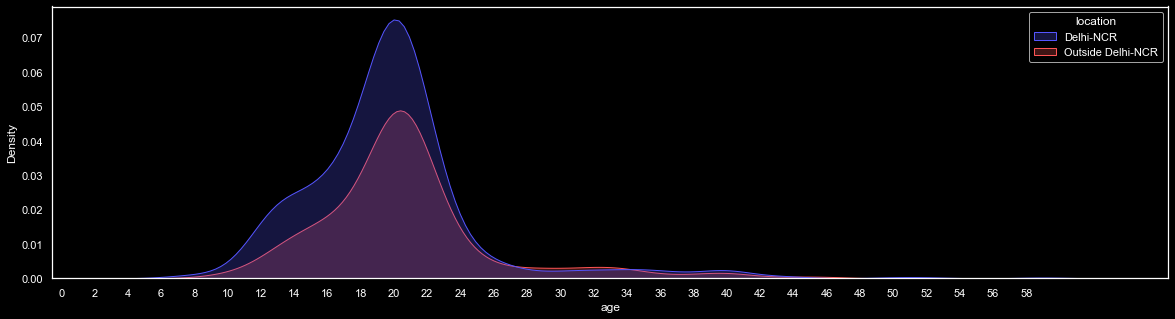

In [142]:
ax= plt.axes()
sns.kdeplot(x= 'age', data= df, hue= 'location', palette= 'seismic', fill= True, ax= ax)
ax.set_xticks(range(0, 60, 2));

More people are from delhi...

# <center> The OFFICIAL questions are ended, now starting some funny </center>

## Which age group do use instagram ?

In [144]:
age_group = pd.cut(df.age, 10)
temp = pd.concat([df, age_group.rename("age_group")], axis= 1)
temp.sample(5)

,location,age,adultness,class_time,rate,medium,self_study_time,fitness_time,sleep_time,social_time,social,tv_time,meals,weight,health_iss,free_mind,produ_time,connected_ffr,miss,age_group
533,Delhi-NCR,19,True,2.0,Excellent,Smartphone,2.0,1,10.0,2.0,Youtube,1,2,Remain Constant,NO,Sleeping,YES,YES,School/college,"(17.4, 22.6]"
1083,Delhi-NCR,16,False,4.0,Average,Laptop/Desktop,1.0,1,9.0,2.0,Youtube,0.4,4,Remain Constant,NO,Online gaming,YES,NO,Friends,"(12.2, 17.4]"
474,Outside Delhi-NCR,19,True,4.0,Very poor,Laptop/Desktop,3.0,1,8.0,3.0,Whatsapp,2,3,Increased,NO,Meditation,YES,YES,School/college,"(17.4, 22.6]"
586,Outside Delhi-NCR,24,True,2.0,Average,Smartphone,1.0,1,7.0,4.0,Instagram,0,3,Remain Constant,NO,Football,YES,YES,School/college,"(22.6, 27.8]"
1181,Delhi-NCR,13,False,5.0,Good,Tablet,2.0,0,7.0,1.0,Whatsapp,1,3,Remain Constant,NO,Talking,YES,YES,School/college,"(12.2, 17.4]"


<AxesSubplot:xlabel='age_group', ylabel='count'>

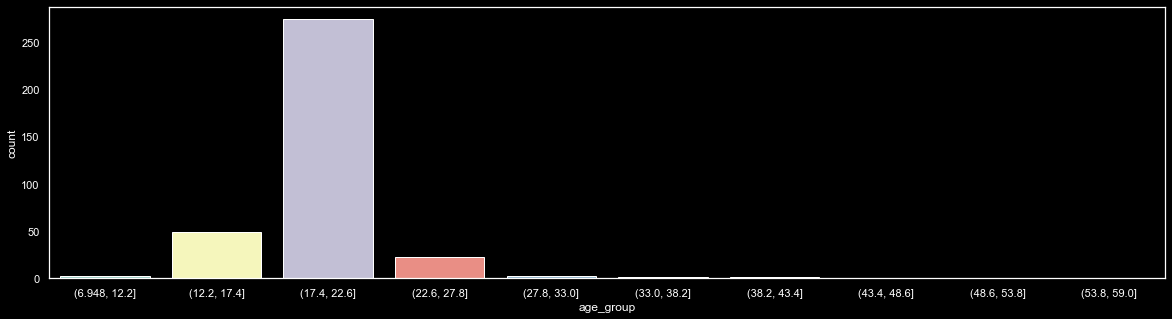

In [145]:
sns.countplot(x= 'age_group', data= temp[temp.social == 'Instagram'][['age_group']])

### People between 17 to 23 are using Instagram as their waste of time hah!

<AxesSubplot:xlabel='age_group', ylabel='count'>

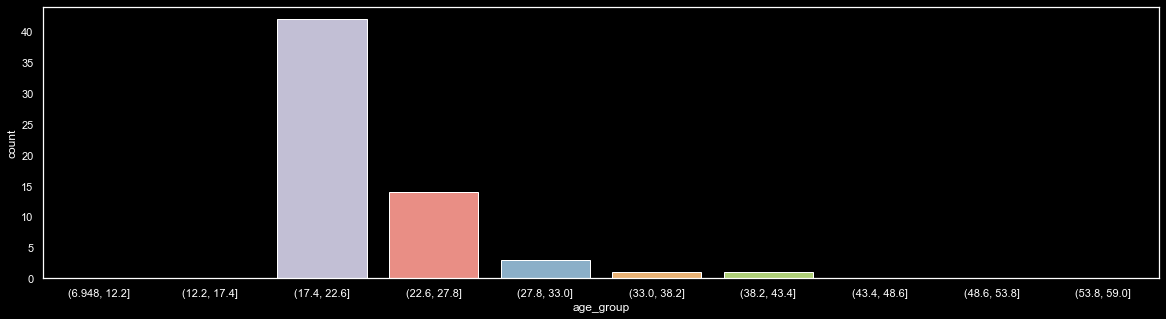

In [146]:
#What about linkedin
sns.countplot(x= 'age_group', data= temp[temp.social == 'Linkedin'][['age_group']])

# Thanks!
It was fun to explore in this dataset!  
If you find any other aspect that I should have looked, then let me know - It is my beginning so this EDA might not be much informative. 

Happy to recive feedback.

# What else should I do to test the hypothesis?